# Text Analysis using VADER: Valence Aware Dictionary and Sentiment Reasoner. 
VADER uses a combination of sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is. The method has a lexicon that serves as a reference manual to measure the sentiment of a chunk of text.

In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bohras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
file = pd.read_csv('C:/Users/bohras/Desktop/INC- Cluster/Description.csv', sep=";", encoding='cp1252')
file.head()

,desc
0,Description:\n\nParty IDs are having almost 20...
1,"Hi Qlik Team,\r\nRequesting you to please crea..."
2,Description:\n\nNote: This is related to issue...
3,the JBP data in EAP seems to be incorrect as n...
4,Description:\n\nRelative column values are not...


In [3]:
file.shape

(428, 1)

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [5]:
file['scores'] = file['desc'].apply(lambda description: SIA.polarity_scores(str(description)))
file.head(20)

,desc,scores
0,Description:\n\nParty IDs are having almost 20...,"{'neg': 0.042, 'neu': 0.897, 'pos': 0.061, 'co..."
1,"Hi Qlik Team,\r\nRequesting you to please crea...","{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
2,Description:\n\nNote: This is related to issue...,"{'neg': 0.019, 'neu': 0.918, 'pos': 0.063, 'co..."
3,the JBP data in EAP seems to be incorrect as n...,"{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'comp..."
4,Description:\n\nRelative column values are not...,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp..."
5,Description:\n\nBartek and team were validatin...,"{'neg': 0.056, 'neu': 0.868, 'pos': 0.076, 'co..."
6,"Description:\n\nHi ,\nPlease take this as prio...","{'neg': 0.013, 'neu': 0.955, 'pos': 0.033, 'co..."
7,"Description:\n\nHi Team,\nPlease update segmen...","{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp..."
8,"Description:\n\nHi EAP Team,\n\nHi Team,\n\nWe...","{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp..."
9,Description:\n\nWe need an Extract from Produc...,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp..."


In [6]:
sent = "Hi Qlik Team, Requesting you to please create a RAR Qlik Dashboard using the below table.ea_fin.RAR_e2emonitoring_finsummary_vw_v_factThanks,Tanu"


sentiment_dict = SIA.polarity_scores(sent)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.5267}


In [7]:
file['compound']  = file['scores'].apply(lambda score_dict: score_dict['compound'])

file.head()

,desc,scores,compound
0,Description:\n\nParty IDs are having almost 20...,"{'neg': 0.042, 'neu': 0.897, 'pos': 0.061, 'co...",0.4768
1,"Hi Qlik Team,\r\nRequesting you to please crea...","{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.7430
2,Description:\n\nNote: This is related to issue...,"{'neg': 0.019, 'neu': 0.918, 'pos': 0.063, 'co...",0.6249
3,the JBP data in EAP seems to be incorrect as n...,"{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'comp...",0.3182
4,Description:\n\nRelative column values are not...,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.6124


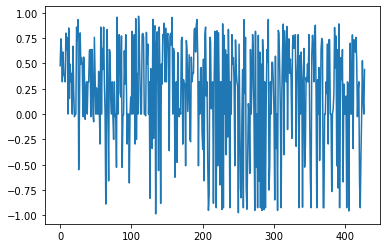

In [8]:
file['compound'].plot()
plt.show()

In [9]:
file['comp_score'] = file['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
file.head()

,desc,scores,compound,comp_score
0,Description:\n\nParty IDs are having almost 20...,"{'neg': 0.042, 'neu': 0.897, 'pos': 0.061, 'co...",0.4768,pos
1,"Hi Qlik Team,\r\nRequesting you to please crea...","{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.7430,pos
2,Description:\n\nNote: This is related to issue...,"{'neg': 0.019, 'neu': 0.918, 'pos': 0.063, 'co...",0.6249,pos
3,the JBP data in EAP seems to be incorrect as n...,"{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'comp...",0.3182,pos
4,Description:\n\nRelative column values are not...,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.6124,pos


In [10]:
file['comp_score'].value_counts()

pos    327
neg    101
Name: comp_score, dtype: int64

<AxesSubplot:title={'center':'VEDAR Analysis'}>

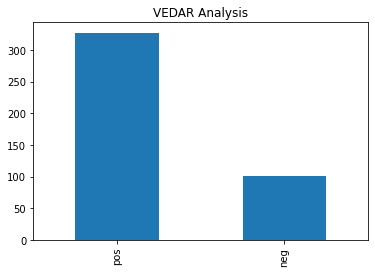

In [11]:
file.comp_score.value_counts().plot(kind='bar', title='VEDAR Analysis')

# Another Approach (Data Cleaning)

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bohras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus = []
for i in range(0,428):
    review = re.sub('[^a-zA-Z]', ' ', file['desc'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['descript parti id almost null combin shipment detail fact sm fact eap data come upstream would like know also null parti id fill request assign team pleas find logic parti id combin shipment tabl sourc td link td link consumpt combin order lr combin orderssellout technic design document docx combin shipment lr combin shipmentsellout technic design document docx logic bi distributor parti id po bi dstr prti id bi distributor parti id chnlptnr ps wo sn fact ss ope ope dstr prti id bi distributor parti id ope sl ord spmt ref bi resel parti id po bi rslr prti id bi resel parti id chnlptnr ps wo sn fact ss case upper ope ope dstr prti id lt gt distributor upper ope ope rslr prti id resel upper ope ope sldt prti id unmatch ope ope sldt prti id els ope ope rslr prti id end bi resel parti id ope sl ord spmt ref bi end custom parti id po end cust parti id bi end custom parti id chnlptnr ps wo sn fact ss case upper ope ope end cust prti id end custom upper ope ope src end cust prti id unmatch 

In [15]:
dfObj = pd.DataFrame(corpus) 

In [16]:
dfObj.head(10)

,0
0,descript parti id almost null combin shipment ...
1,hi qlik team request pleas creat rar qlik dash...
2,descript note relat issu rais part inc sampl o...
3,jbp data eap seem incorrect refresh sinc data ...
4,descript rel column valu show correct data com...
5,descript bartek team valid last month record p...
6,descript hi pleas take prioriti flush fill bmt...
7,descript hi team pleas updat segment bmt tabl ...
8,descript hi eap team hi team receiv ask busi e...
9,descript need extract product bmt tabl ea shar...


In [17]:
dfObj.rename({0: 'new_desc'}, axis=1, inplace=True)
dfObj

,new_desc
0,descript parti id almost null combin shipment ...
1,hi qlik team request pleas creat rar qlik dash...
2,descript note relat issu rais part inc sampl o...
3,jbp data eap seem incorrect refresh sinc data ...
4,descript rel column valu show correct data com...
...,...
423,descript copi prti asscn dmnsn qvd prd itg itg...
424,descript pleas creat new stream qs colo itg qs...
425,configur qs softwar three cp node implement ca...
426,instal test scalabl tool qs prod environ colo eap


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()
dfObj['compound'] = [analyzer.polarity_scores(x)['compound'] for x in dfObj['new_desc']]
dfObj['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dfObj['new_desc']]
dfObj['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dfObj['new_desc']]
dfObj['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dfObj['new_desc']]

In [20]:
dfObj.head(10)

,new_desc,compound,neg,neu,pos
0,descript parti id almost null combin shipment ...,-0.8957,0.048,0.937,0.015
1,hi qlik team request pleas creat rar qlik dash...,0.3612,0.000,0.884,0.116
2,descript note relat issu rais part inc sampl o...,0.1280,0.019,0.957,0.025
3,jbp data eap seem incorrect refresh sinc data ...,0.0000,0.000,1.000,0.000
4,descript rel column valu show correct data com...,0.0000,0.000,1.000,0.000
5,descript bartek team valid last month record p...,0.6369,0.040,0.886,0.075
6,descript hi pleas take prioriti flush fill bmt...,0.0000,0.000,1.000,0.000
7,descript hi team pleas updat segment bmt tabl ...,0.0000,0.000,1.000,0.000
8,descript hi eap team hi team receiv ask busi e...,-0.8020,0.085,0.915,0.000
9,descript need extract product bmt tabl ea shar...,0.7096,0.000,0.910,0.090


In [21]:
dfObj.loc[dfObj.compound > 0, 'sentiment_type'] = 'POSITIVE'
dfObj.loc[dfObj.compound == 0, 'sentiment_type'] = 'NEUTRAL'
dfObj.loc[dfObj.compound < 0, 'sentiment_type'] = 'NEGATIVE'

In [22]:
dfObj.head()

,new_desc,compound,neg,neu,pos,sentiment_type
0,descript parti id almost null combin shipment ...,-0.8957,0.048,0.937,0.015,NEGATIVE
1,hi qlik team request pleas creat rar qlik dash...,0.3612,0.000,0.884,0.116,POSITIVE
2,descript note relat issu rais part inc sampl o...,0.1280,0.019,0.957,0.025,POSITIVE
3,jbp data eap seem incorrect refresh sinc data ...,0.0000,0.000,1.000,0.000,NEUTRAL
4,descript rel column valu show correct data com...,0.0000,0.000,1.000,0.000,NEUTRAL


<AxesSubplot:title={'center':'VEDAR Analysis'}>

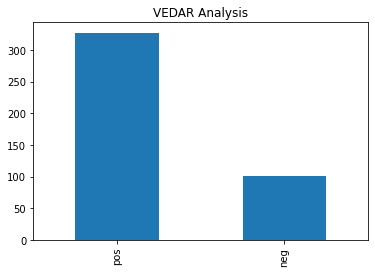

In [23]:
file.comp_score.value_counts().plot(kind='bar', title='VEDAR Analysis')

In [24]:
dfObj['sentiment_type'].value_counts()

POSITIVE    199
NEUTRAL     126
NEGATIVE    103
Name: sentiment_type, dtype: int64

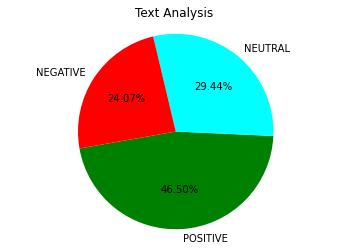

In [25]:
#On Pie Chart
labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['green', 'cyan', 'red']
sizes = [199, 126, 103]
plt.pie(sizes, labels=labels, colors=colors, startangle=190, autopct='%2.2f%%')
plt.title('Text Analysis')
plt.axis('equal')
plt.show()